## Exercise 5.1: Bias-Variance Analysis

In this exercise we explore the bias and variance for different model classes given the simple target function $f(x) = \sin \pi x$. The model classes to investigate are:
  * Constant models: $h(x) = b$
  * Linear models: $h(x) = w x + b$
  * Polynomial models: $h(x) = w_d x^d + \ldots + w_2 x^2 + w_1 x + b $
  
You already know how to fit linear models. Polynomial models can be trained the same way if the dataset is augmented with the polynomial features first. Scikit-learn already offers a [convenient function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) to do this for you, but you are welcome to build your own solution for this.

**Task a): Model fitting.**
Fill in the functions below for augmenting datasets as well as fitting and evaluating the models to be investigated. Make sure to understand the dimensionality of input and output of each function.

In [26]:
import numpy as np

# We will use polynomials of degree 3 in this exercise
poly_degree = 3

# Shape guidelines
# X: (samples, features)
# y: (samples, targets)
# weights: (features, targets)

# A helper function to make sure that we fit and evaluate matrices of
# correct sizes. Remember that the first dimension always indicates
# the samples and the second the features or targets.
# Not all of these constraints are strictly necessary, but they will make
# your life easier when things go wrong.
def verify_shapes(X=None, y=None):
    if X is not None:
        assert X.ndim == 2 and X.shape[1] == 1
    if y is not None:
        assert y.ndim == 2 and y.shape[1] == 1
        if X is not None:
            assert y.shape[0] == X.shape[0]


# The ground-truth that we want to approximate.
# We only care about the domain [-1, 1], so no further preprocessing is required.
# The verify_shapes(X) call assumes that X represents a single dataset.
def target(X):
    verify_shapes(X)
    return np.sin(np.pi * X)


# Fit a constant model h(x) = b.
# Fitting only a bias reduces to the mean over the targets.
# Remember to keep the correct shape!
def fit_constant(X, y):
    verify_shapes(X, y)
    # TODO
    y_target = np.mean(target(X), axis=0)
    return y_target
#     pass
    

# Predict with a constant model defined by its bias b.
def predict_constant(X, b):
    verify_shapes(X)
    # TODO
    return b
#     pass


# Fit a linear model h(x) = wx + b.
# You can use the Moore-penrose pseudoinverse or the 
# least squares function in numpy.linalg.
# Remember to augment the dataset to include a column for the bias.
def fit_linear(X, y):
    verify_shapes(X, y)
    # TODO
    bias_col = np.ones((X.shape[0], 1))
    phi = np.hstack((bias_col, X))
    diag_mat = np.matmul(phi.T, phi)
    weights = np.matmul(np.matmul(np.linalg.pinv(diag_mat), phi.T), y)
    return weights
#     pass

# Predict with  a linear model defined by its weights w. Remember to augment X!
def predict_linear(X, w):
    verify_shapes(X)
    # TODO
    bias_col = np.ones((X.shape[0], 1))
    phi = np.hstack((bias_col, X))
    
    y_target = np.matmul(phi, w)
    return y_target
#     pass


# Fit a polynomial model of degree 'poly_degree'.
# Augment the dataset with polynomial features
# and fit a linear model to it.
def fit_polynomial(X, y):
    verify_shapes(X, y)
    # TODO
    phi = np.ones((X.shape[0], 1))
    for i in range(poly_degree):
        aug_col = np.power(X, (i+1))
        phi = np.hstack((phi, aug_col))
        
    diag_mat = np.matmul(phi.T, phi)
    weights = np.matmul(np.matmul(np.linalg.pinv(diag_mat), phi.T), y)
    return weights
#     pass

# Predict with a polynomial model defined by its weights w.
# Remember to augment X!
def predict_polynomial(X, w):
    verify_shapes(X)
    # TODO
    phi = np.ones((X.shape[0], 1))
    for i in range(poly_degree):
        aug_col = np.power(X, (i+1))
        phi = np.hstack((phi, aug_col))
        
    y_target = np.matmul(phi, w)
    return y_target
#     pass

In [27]:
fu = np.ones((5, 1))
fu

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

The code below compares your solution to an obfuscated solution. You can uncomment this to have a test case for your implementation. If you can't manage to implement the polynomial fitting and prediction, you can also use these functions for the next exercises.

In [28]:
'''
import zlib, base64
exec(zlib.decompress(base64.b64decode('eJzVVEtOwzAU3OcUWSa0RFTskLLgVzDfGgwuQqgyrZ2aOraxnZb09KQFiQ2b5wUSBxjNm3kzI5ypU79QnDldWMetM1PuvdRVKmtrXEhHRrXa1JKpIWehcdynzKdWJCdn+rDyi9pdX50+HT2cv33cLC+EDev2ftpcPt6psTRsePt6zFez99GcYlQOmfIcDCS4JK7hyfdBuqltu7lBW/gNpNS24C34CILoBqmkZqqCgjGh5T4chEorMjhVH/4YMITgHKyHkhJuQSFkmATHtBfG1XBOBOXsHl1YqZfJjIsUiqU4G/fb/CCBIjGCm0NJNs6T1PGulBpMSBE4WojkxcyErM3jzEGdOat/YQ4iW6GrOKFom4K+41WjmJNrFqTRkxWX1TxEyafbVP2lb1DJmJbZgO8O9nq/q96BD3VEPAs/Z5Y/D15iFICXIqJCnU+9CFlfaYyoa3QDOjsiOYufkRAWPL4UJzYChRLhHHzpcfIJdeA7LA==')))
fit_polynomial_solution = fp
predict_polynomial_solution = pp
fit_ridge_regression_solution = frr

X_rand = np.random.uniform(-1, 1, size=(100, 1))
y_rand = np.random.uniform(-1, 1, size=(100, 1))
w_task = fit_polynomial(X_rand, y_rand)
w_sol = fit_polynomial_solution(X_rand, y_rand)
pred_task = predict_polynomial(X_rand, w_sol)
pred_sol = predict_polynomial_solution(X_rand, w_sol)
if not (pred_task is None or w_task is None):
    print('Correct:')
    print('\tPolynomial fitting function:', np.allclose(w_task, w_sol, rtol=1e-3))
    print('\tPolynomial Prediction function:', np.allclose(w_task, w_sol, rtol=1e-3))
else:
    print('Polynomial functions not implemented.')
'''
None

Now that we can fit and evaluate these functions, we should create the datasets to evaluate the bias and variance of each model class. Since the bias-variance decomposition is defined as an expectation, we need to create sufficiently many datasets to get a good estimate.

---

**Task b): Model analysis.** Fit 100 models of each class to 100 datasets with only 5 samples each. Determine the average models and calculate the bias and variance of each class.

**Hint**: Remember the sample mean for the integrals: $\mathbb{E}[x] = \int x \ p(x) \ dx \approx \frac{1}{N} \sum_i^N x_i$

We provide you with plotting code for the visualization of the fitted and the average models below the code stub.

In [30]:
n_datasets = 100
n_samples = 5

# Bookkeeping
# We can store all the samples efficiently by using a 3d-array
# We will later replace the zeros in these placeholder arrays, when we loop across datasets
X_all = np.zeros((n_datasets, n_samples, 1))
y_all = np.zeros((n_datasets, n_samples, 1))

# We also need to keep track of every model
# Since we only have 1 feature dimension, the number of dimensions
# for the polynomial model simplifies to poly_degree + 1
constant_models = np.zeros((n_datasets, 1, 1))
linear_models = np.zeros((n_datasets, 2, 1))
polynomial_models = np.zeros((n_datasets, poly_degree + 1, 1))

# For each dataset: Sample x uniformly in [-1, 1], calculate the ground truth `y`,
# and fit the models with the previously defined functions.
for i in range(n_datasets):
    # TODO
    X_all[i] = np.random.uniform(low=-1, high=1, size=(n_samples, 1))
    y_all[i] = target(X_all[i])
#     pass

# Determine the average model for each class by
# averaging over the first axis
# TODO
for i in range(n_datasets):
    constant_models[i] = fit_constant(X_all[i], y_all[i])
    linear_models[i] = fit_linear(X_all[i], y_all[i])
    polynomial_models[i] = fit_polynomial(X_all[i], y_all[i])
average_constant_model = np.mean(constant_models, axis=0)
average_linear_model = np.mean(linear_models, axis=0)
average_polynomial_model = np.mean(polynomial_models, axis=0)

# In order to evaluate the models over the ground truth, we form
# a linearly spaced grid in the target domain
X_predict = np.linspace(-1, 1, 200).reshape((-1, 1))
y_predict = target(X_predict)

# Calculate the bias and variance for each class with X_predict and y_predict
# TODO
# calculate bias; first things first
constant_models_pred = predict_constant(X_predict, average_constant_model)
linear_models_pred = predict_linear(X_predict, average_linear_model)
polynomial_models_pred = predict_polynomial(X_predict, average_polynomial_model)
res_1 = np.zeros_like(y_predict) 
res_2 = np.zeros_like(y_predict)
res_3 = np.zeros_like(y_predict)

for i in range(n_datasets):
    constant_models_p = predict_constant(X_predict, constant_models[i])
    res_1 = res_1 + np.power((constant_models_p - y_predict), 2)
    
    linear_models_p = predict_linear(X_predict, linear_models[i])
    res_2 = res_2 + np.power((linear_models_p - y_predict), 2)
    
    polynomial_models_p = predict_polynomial(X_predict, polynomial_models[i])
    res_3 = res_3 + np.power((polynomial_models_p - y_predict), 2)
    
bias_constant_models = np.mean(np.power((constant_models_pred - y_predict), 2), 
                               axis=0)
variance_constant_models = np.mean((1.0/n_datasets) * res_1)

bias_linear_models = np.mean(np.power((linear_models_pred - y_predict), 2), 
                             axis=0)
variance_linear_models = np.mean((1.0/n_datasets) * res_2)

bias_polynomial_models = np.mean(np.power((polynomial_models_pred - y_predict), 2), 
                                 axis=0)
variance_polynomial_models = np.mean((1.0/n_datasets) * res_3)
    
# Print the decomposition
bias_info = '''Bias:
    Constant models: {:.3f}
    Linear models: {:.3f}
    Polynomial models: {:.3f}'''
print(bias_info.format(
    float(bias_constant_models),
    float(bias_linear_models),
    float(bias_polynomial_models)
))

variance_info = '''Variance:
    Constant models: {:.3f}
    Linear models: {:.3f}
    Polynomial models: {:.3f}'''
print(variance_info.format(
    float(variance_constant_models),
    float(variance_linear_models),
    float(variance_polynomial_models)
))

Bias:
    Constant models: 0.498
    Linear models: 0.204
    Polynomial models: 0.101
Variance:
    Constant models: 0.588
    Linear models: 0.505
    Polynomial models: 2.079


**Q 5.1.1: How and why do the bias and variance differ for the investigated model classes? How do they relate to the over- and underfitting terminology?**

**Q 5.1.2: So which model would you prefer and why?**

## Plotting Code

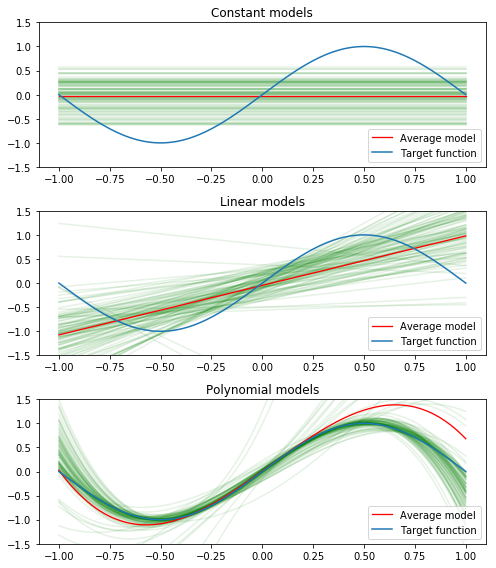

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
try: import seaborn as sns
except ImportError: pass
    
# Plotting
fig, axes = plt.subplots(3, 1, figsize=(7, 8))
axes[0].set_title('Constant models')
axes[1].set_title('Linear models')
axes[2].set_title('Polynomial models')

# Plot all the fitted models
for dataset in range(n_datasets):
    constant = constant_models[dataset].flatten()
    axes[0].plot((-1, 1), (constant, constant), c='g', alpha=0.1)
    
    weights = linear_models[dataset]
    axes[1].plot((-1, 1), (weights[0] - weights[1], weights[0] + weights[1]),
                 c='g', alpha=0.1)
    y_poly = predict_polynomial(X_predict, polynomial_models[dataset])
    if y_poly is not None:
        axes[2].plot(X_predict, y_poly, c='g', alpha=0.1)
    
# Plot the average models
if average_linear_model is not None:
    axes[1].plot((-1, 1), 
        (average_linear_model[0] - average_linear_model[1],
        average_linear_model[0] + average_linear_model[1]),
        c='r', lw=1.3, label='Average model')
if average_constant_model is not None:
    axes[0].plot((-1, 1), 
        (average_constant_model.flatten(), average_constant_model.flatten()),
        c='r', lw=1.3, label='Average model')
if average_polynomial_model is not None:
    axes[2].plot(X_predict, predict_polynomial(X_predict, average_polynomial_model), 
        c='r', lw=1.3, label='Average model')

for a in axes:
    a.plot(X_predict, target(X_predict), label='Target function')
    a.set_xlim((-1.1, 1.1))
    a.set_ylim((-1.5, 1.5))
    a.legend(loc='lower right')
    
fig.tight_layout()